# Bank Marking Conversion Prediction

BitTiger DS501

#    <font color='green'>Executive Summary</font> 

### <font color='green'>1. Data Cleaning: </font> 
The data itself is pretty clean and well-defined, without NAs, so there's no need for big effort in data cleaning. 
### <font color='green'> 2. EDA: </font> 
We have several numerical and categorical features to predict a categorical response: subscribed or not.

We checked the following during EDA: 
<br>
For numeric features: 
1. Distribution across different response through Boxplot
2. Nonlinearity through binning and plotting subscription rate across different bins, and see if any treatment is necessary. 
3. Correlation between numerical variables and response y, to use the sign as a proxy for univariate test.

For categorical features: 
count and subscription % across different categories through table and barplot

From the result of EDA, we want to pay closer attention to the following features, since they likely have a bigger impact on response. 
<br>
numerical features: balance, duration and pdays 
<br>
categorical features: education, default, housing or personal loan, contact method, month, and poutcome

We have added 'firstcamp' as a new feature, to treat the nonlinearity of 'pdays'. Also account for the fact pdays=-1 means 'no previous contact', blended with all other numerical values will dilute its influence. 

### <font color='green'> 3. Modeling & Result Interpretation </font> 

We created dummy variables for categorical features, and reserved 30% data for testing as a preparation for modeling. 

First, we tried logistic regression as a starter. Since is the easiest to interpret, and we can look at coefficients to understand the influence for different features: 
1. Perform standardization before regularization, since we have different numeric and categorical features at different scales. 
2. Fit logistic regression model with L2 regularization. 
3. Predict and get a test AUC of 0.899545. 
5. Check P Value for all features for significance 
4. Get the coefficient of features to understand their impact individually. 
6. Result Interpretation:
<br>
Features with large negative correlation: 
<br>
contact_unknown, failure or unknown of result from last contact, campaign, has loans (housing or personal);
<br>
Features with high positive correlation:
<br>
duration, success of past contact, contact via cellular or telephone, no loans, and retired or student. 


Second, we tried different classification models to see if we can get a better performance for this problem. The performance of test AUC are as below for different models:

Bagged Trees:0.9263
<br>
Bagged KNN: 0.8316
<br>
Support Vector Machine: 0.7270
<br>
Random Forest:0.9273 
<br>
Gradient Boosted Trees: 0.9298 
<br>

As a third step, Grid Search has been applied to the good performers (Random Forest and Gradient Boosted Trees) to tune the hyper parameter and increase the performance a little more.

Overall, from the interpretation perspective, Logistic Regression might be the best choice since we can generate reason code for different features if necessary. From a performance perspective, Gradient Boosted Trees seem to be the best classifier for this problem. 


### <font color='green'>4. Afterthoughts:</font> 
Last contact Month of year seem to be a big influencer for response (either negatively or positively). If that's really the case, it's not easy to translate this into action (ex. only contacting clients during June does not seem reasonable). Intuitively, this does not make too much sense, it could be some other variables contributing to this effect, but has not been included in the dataset. We should do more investigation on this as a next step. 


### <font color='green'>5. Code:</font> 
Please see source code available at: 


# Dataset Description

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt


# Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
# Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

# Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Data Info
5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

# Attribute information:

   For more information, read [Moro et al., 2011].

## Input variables:

### bank client data:
  - 1 - age (numeric)
  - 2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management","housemaid","entrepreneur","student","blue-collar", "self-employed","retired","technician","services") 
  - 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  - 4 - education (categorical: "unknown","secondary","primary","tertiary")
  - 5 - default: has credit in default? (binary: "yes","no")
  - 6 - balance: average yearly balance, in euros (numeric) 
  - 7 - housing: has housing loan? (binary: "yes","no")
  - 8 - loan: has personal loan? (binary: "yes","no")
  
### related with the last contact of the current campaign:
  - 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  - 10 - day: last contact day of the month (numeric)
  - 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - 12 - duration: last contact duration, in seconds (numeric)
  
### other attributes:
  - 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  - 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##  Output variable (desired target):
  - 17 - y - has the client subscribed a term deposit? (binary: "yes","no")



## Load data and browse data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [4]:
# Load data from file
df = pd.read_csv('bank/bank-full.csv',sep=';')

In [5]:
# Browse dataset
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [192]:
# Show summary stats
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df['y'] = (df['y']=='yes').astype(int)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Data Exploration

We're looking at categorical response with numerical and categorical features

For Numerical Features, checking boxplot and their distribution across different response value, as well as non-linearity.

In [8]:
df[df['y']==1].describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354,1.0
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272,0.0
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000,1.0
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000,1.0
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000,1.0
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000,1.0
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000,1.0


In [9]:
df[df['y']==0].describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.0
mean,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154,0.0
std,10.172662,2974.195473,8.294728,207.383237,3.212767,96.757135,2.256771,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.0
25%,33.000000,58.000000,8.000000,95.000000,1.000000,-1.000000,0.000000,0.0
50%,39.000000,417.000000,16.000000,164.000000,2.000000,-1.000000,0.000000,0.0
75%,48.000000,1345.000000,21.000000,279.000000,3.000000,-1.000000,0.000000,0.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,0.0


From here we can tell, in the data we have more clients that did not subscribe. 
It seems there's a potential significant difference in balance, duration, pdays, and previous among two groups. We'll need to look into 'pdays' more since -1 is accounting for mass majority of the records. 
We'll look into more details for each variables later. 

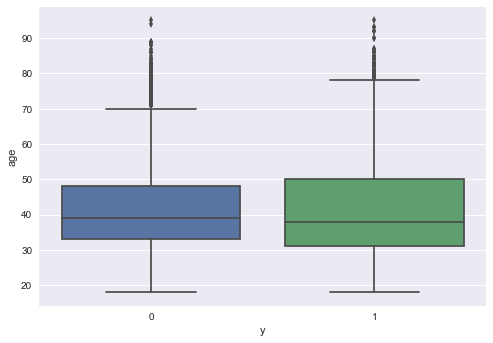

In [10]:
import seaborn
seaborn.boxplot(df['y'],df['age'])

The clients who subscribe seems to have a wider range of age, which might be interesting since we have fewer subscribed clients.

In [12]:
b=df['y'].groupby(pd.cut(df['age'],10)).value_counts()
c=b.groupby(level=[0]).apply(lambda x: x / float(x.sum()))

In [13]:
c

age             y
(17.923, 25.7]  0    0.760479
                1    0.239521
(25.7, 33.4]    0    0.875543
                1    0.124457
(33.4, 41.1]    0    0.899807
                1    0.100193
(41.1, 48.8]    0    0.909420
                1    0.090580
(48.8, 56.5]    0    0.908293
                1    0.091707
(56.5, 64.2]    0    0.849940
                1    0.150060
(64.2, 71.9]    0    0.607427
                1    0.392573
(71.9, 79.6]    0    0.544554
                1    0.455446
(79.6, 87.3]    0    0.586207
                1    0.413793
(87.3, 95.0]    0    0.500000
                1    0.500000
Name: y, dtype: float64

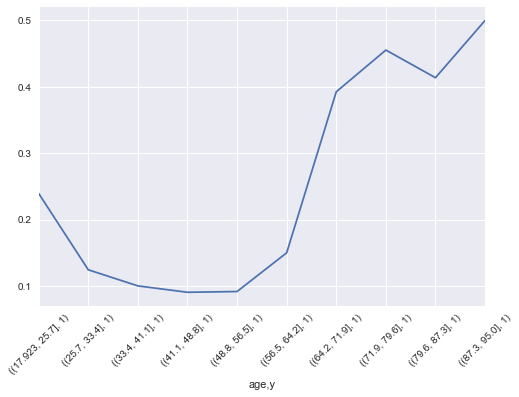

In [69]:
c[1::2].plot(rot=45)

We can see some non-linearity in age. We can use binning to address that later if we want to improve the performance of Logistic Regression model further. 

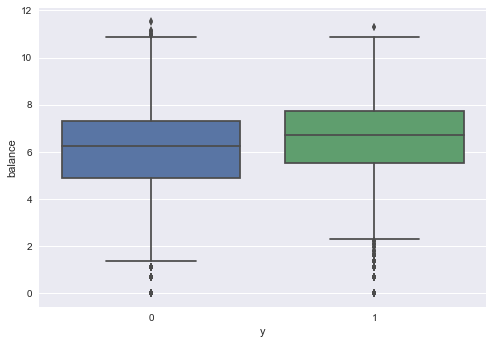

In [11]:
seaborn.boxplot(df['y'], df['balance'].apply(np.log))

Group 1 seems to have a higher average and lowerbound than Group 0. 

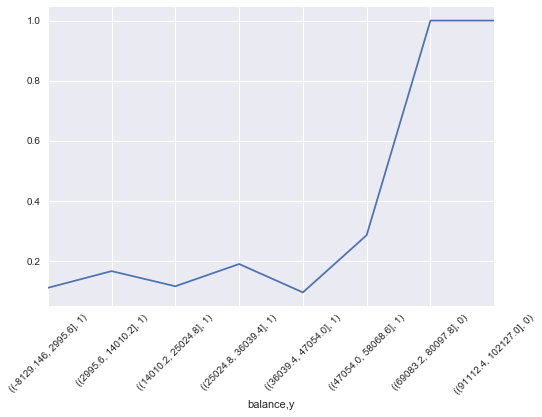

In [70]:
b=df['y'].groupby(pd.cut(df['balance'],10)).value_counts()
c=b.groupby(level=[0]).apply(lambda x: x / float(x.sum()))
c[1::2].plot(rot=45)

We can see a little non-linearity in balance as well. We can also do something to address that later if we want to improve the performance of Logistic Regression model. 

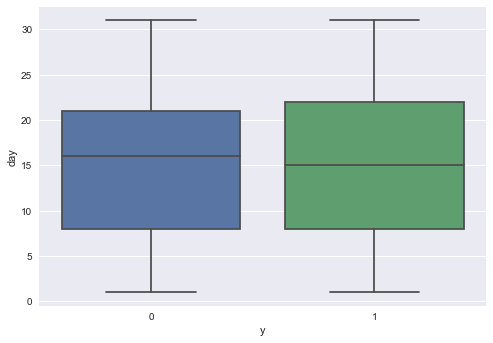

In [31]:
seaborn.boxplot(df['y'], df['day'])

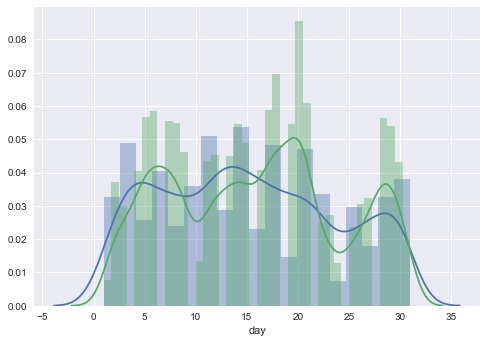

In [32]:
seaborn.distplot(df[df['y']==1]['day'])
seaborn.distplot(df[df['y']==0]['day'])

A slight difference in distribution, not sure if that matters. 

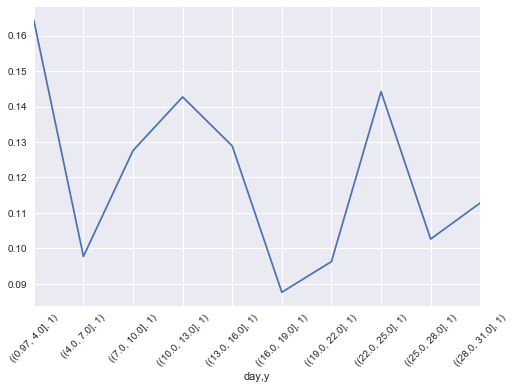

In [71]:
b=df['y'].groupby(pd.cut(df['day'],10)).value_counts()
c=b.groupby(level=[0]).apply(lambda x: x / float(x.sum()))
c[1::2].plot(rot=45)

We see non-linearity in day for sure. 
But that does not seem to be correlated with the repsonse that much. We'll monitor this moving forward.

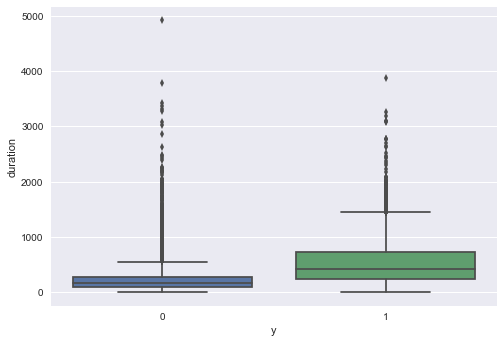

In [33]:
seaborn.boxplot(df['y'], df['duration'])

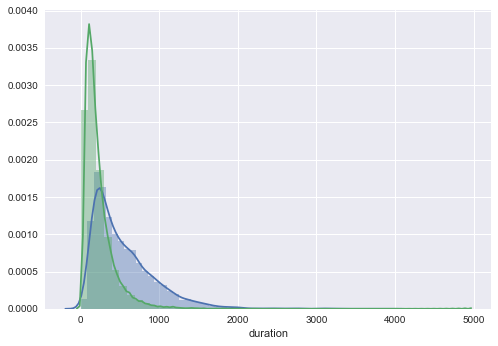

In [35]:
seaborn.distplot(df[df['y']==1]['duration'])
seaborn.distplot(df[df['y']==0]['duration'])

Duration seem to have a big impact for response, with significantly higher duration for Group 1. 

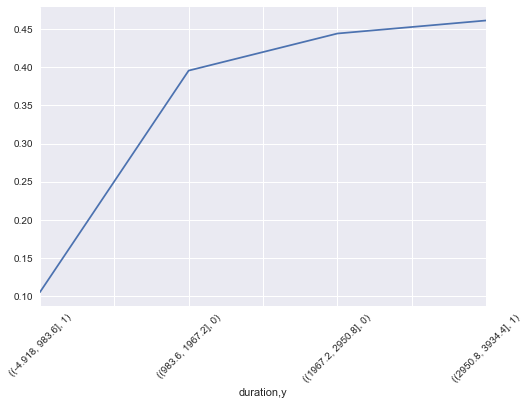

In [73]:
b=df['y'].groupby(pd.cut(df['duration'],5)).value_counts()
c=b.groupby(level=[0]).apply(lambda x: x / float(x.sum()))
c[1::2].plot(rot=45)

Duration can be considered to pass the linearity check. 

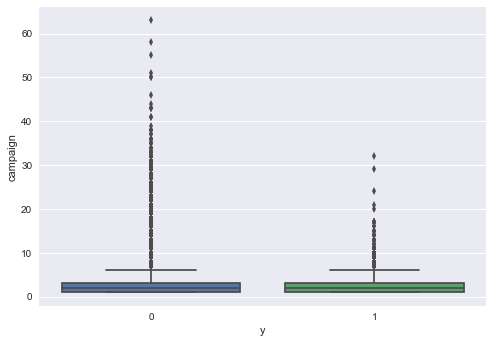

In [38]:
seaborn.boxplot(df['y'], df['campaign'])

In [41]:
df[['y', 'campaign']].groupby(['y']).describe()

campaign                                              
     count      mean       std  min  25%  50%  75%   max
y                                                       
0  39922.0  2.846350  3.212767  1.0  1.0  2.0  3.0  63.0
1   5289.0  2.141047  1.921826  1.0  1.0  2.0  3.0  32.0

Average number of campain (number of contacts performed during this campaign) seem to be higher for Group 0 than Group 1. Will pay attention to the coefficients in the model later.  

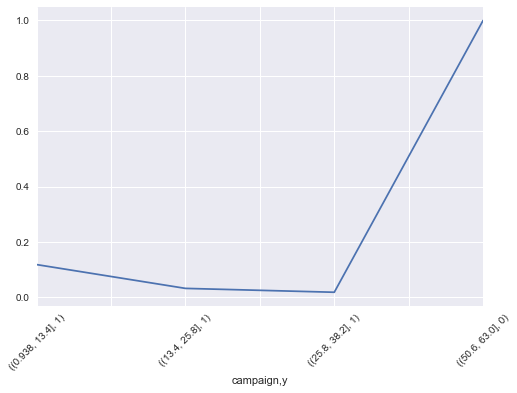

In [74]:
b=df['y'].groupby(pd.cut(df['campaign'],5)).value_counts()
c=b.groupby(level=[0]).apply(lambda x: x / float(x.sum()))
c[1::2].plot(rot=45)

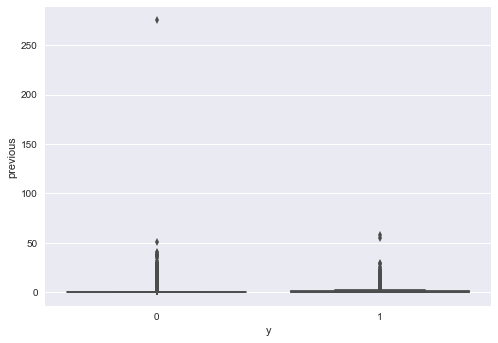

In [42]:
seaborn.boxplot(df['y'], df['previous'])

In [47]:
df[['y', 'previous']].groupby(['y']).describe()

previous                                               
     count      mean       std  min  25%  50%  75%    max
y                                                        
0  39922.0  0.502154  2.256771  0.0  0.0  0.0  0.0  275.0
1   5289.0  1.170354  2.553272  0.0  0.0  0.0  1.0   58.0

Previous: # contacts performed before this campaign seem to be slightly higher in Group1. But it doesn't seem to be supper relevant to the repsonse.

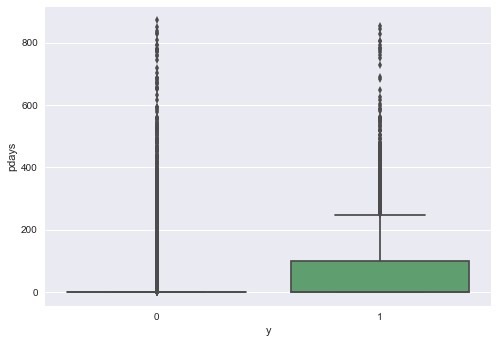

In [60]:
seaborn.boxplot(df['y'], df['pdays'])

pdays=-1 is a special case (no previous campiagn), and seem to account for a big portion of the data with a big impact. Look into ways to treat this seperately. 

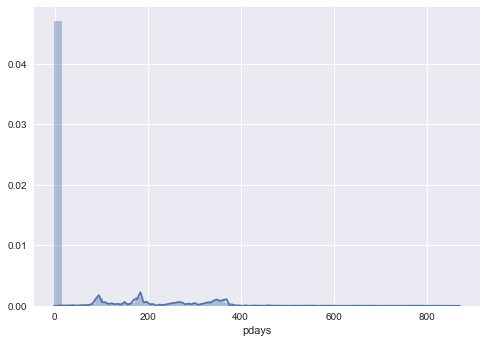

In [23]:
seaborn.distplot(df['pdays'])

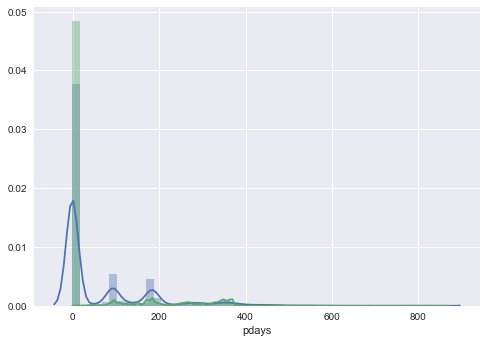

In [29]:
seaborn.distplot(df[df['y']==1]['pdays'])
seaborn.distplot(df[df['y']==0]['pdays'])

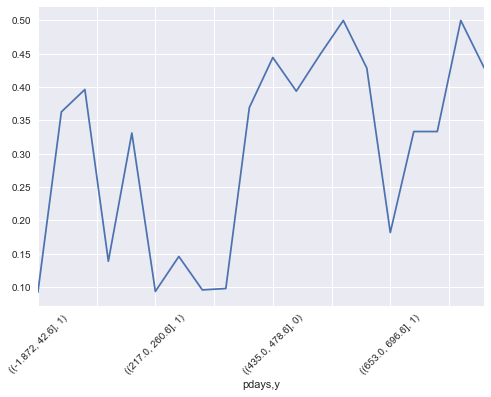

In [82]:
b=df['y'].groupby(pd.cut(df['pdays'],20)).value_counts()
c=b.groupby(level=[0]).apply(lambda x: x / float(x.sum()))
c[1::2].plot(rot=45)

The non-linearity in pdays seem to be very sever and need treatment. Including -1 here for no previous campiagn could be a big driver behind this. So let's look into the pdays=-1 case, and see if we need to seperate this into a different category. 

In [30]:
df[['y', 'pdays']].groupby(['y']).describe()

pdays                                                   
     count       mean         std  min  25%  50%   75%    max
y                                                            
0  39922.0  36.421372   96.757135 -1.0 -1.0 -1.0  -1.0  871.0
1   5289.0  68.702968  118.822266 -1.0 -1.0 -1.0  98.0  854.0

In [12]:
df[df['pdays']==-1].describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.0,36954.0,36954.000000
mean,40.932430,1318.788846,16.145424,257.726119,2.921957,-1.0,0.0,0.091573
std,10.430218,3039.557077,8.372554,262.256406,3.325791,0.0,0.0,0.288427
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.0,0.0,0.000000
25%,33.000000,55.000000,9.000000,101.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,414.000000,17.000000,177.000000,2.000000,-1.0,0.0,0.000000
75%,49.000000,1358.000000,22.000000,318.000000,3.000000,-1.0,0.0,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0,1.000000


In [16]:
df[df['previous']==0].describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.0,36954.0,36954.000000
mean,40.932430,1318.788846,16.145424,257.726119,2.921957,-1.0,0.0,0.091573
std,10.430218,3039.557077,8.372554,262.256406,3.325791,0.0,0.0,0.288427
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.0,0.0,0.000000
25%,33.000000,55.000000,9.000000,101.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,414.000000,17.000000,177.000000,2.000000,-1.0,0.0,0.000000
75%,49.000000,1358.000000,22.000000,318.000000,3.000000,-1.0,0.0,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0,1.000000


Seems like previous = 0 and pdays=-1 are equivalent.

Add a new column 'firstcamp' to account for whether or not another campaign has reached out to the client. 

In [7]:
df['firstcamp']=df['pdays']==-1

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,firstcamp
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,True
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,True
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,True
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,True
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,True


Check correlation between numerical variables and response y, use the sign as a proxy for univariate test.

In [9]:
num_corr=df[['y','age','balance','day','duration','campaign','pdays','previous']]

In [10]:
num_corr.head()

,y,age,balance,day,duration,campaign,pdays,previous
0,0,58,2143,5,261,1,-1,0
1,0,44,29,5,151,1,-1,0
2,0,33,2,5,76,1,-1,0
3,0,47,1506,5,92,1,-1,0
4,0,33,1,5,198,1,-1,0


In [11]:
num_corr.corr()

,y,age,balance,day,duration,campaign,pdays,previous
y,1.000000,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236
age,0.025155,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.052838,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.028348,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,0.394521,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.073172,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.103621,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.093236,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


From correlation calculation, it seems that among the numeric features, balance, duration and previous seem to have a positive sign in univarate test, while campaign seem to be negtive.

#### For Categorical Features, using table & barplot to check subscription rate distribution

In [76]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [87]:
df['y'].groupby(df['job']).value_counts()

job            y
admin.         0    4540
               1     631
blue-collar    0    9024
               1     708
entrepreneur   0    1364
               1     123
housemaid      0    1131
               1     109
management     0    8157
               1    1301
retired        0    1748
               1     516
self-employed  0    1392
               1     187
services       0    3785
               1     369
student        0     669
               1     269
technician     0    6757
               1     840
unemployed     0    1101
               1     202
unknown        0     254
               1      34
Name: y, dtype: int64

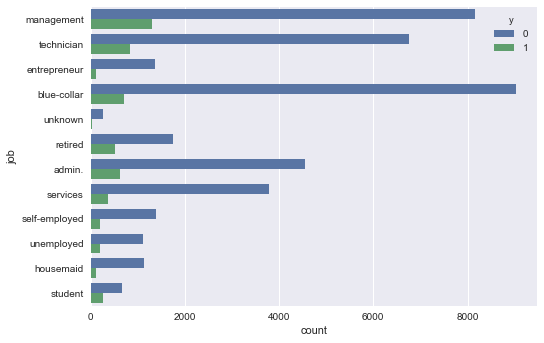

In [93]:
seaborn.countplot(y=df['job'], hue=df['y']);

It seems that for students and retired clients have a higher possbility to subscribe. Will test that later in the model. 

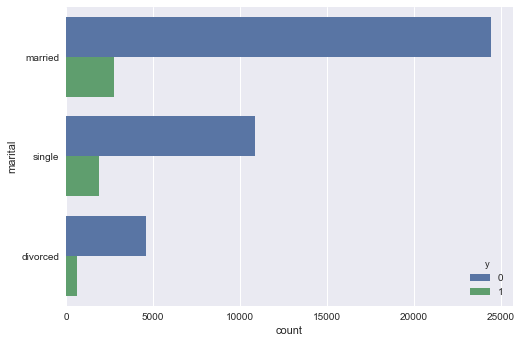

In [95]:
seaborn.countplot(y=df['marital'], hue=df['y']);

It's not clear if there's a difference in marital status for Group 1 and Group 0. Let's look into more details.

In [153]:
a=df['y'].groupby(df['marital']).value_counts()
a.groupby(level=[0]).apply(lambda x: x / float(x.sum()))

marital   y
divorced  0    0.880545
          1    0.119455
married   0    0.898765
          1    0.101235
single    0    0.850508
          1    0.149492
Name: y, dtype: float64

Which shows there's not a significance between the share Group 0 and 1 for different marital status. Will check the output in the model later. 

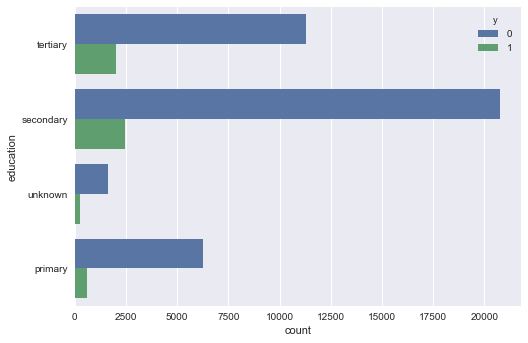

In [155]:
seaborn.countplot(y=df['education'], hue=df['y']);

In [165]:
df['y'].groupby(df['education']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

education  y
primary    0    0.914
           1    0.086
secondary  0    0.894
           1    0.106
tertiary   0    0.850
           1    0.150
unknown    0    0.864
           1    0.136
Name: y, dtype: float64

We can see difference in subscription % amoung different education category. It seems that education and subscription are not unrelated. 

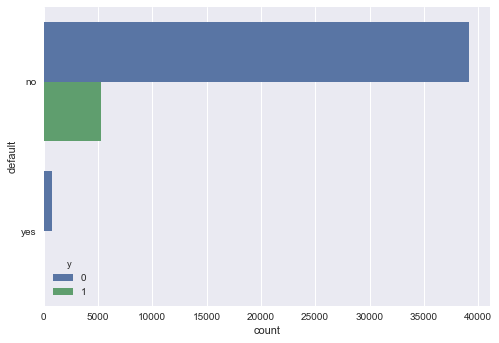

In [166]:
seaborn.countplot(y=df['default'], hue=df['y']);

In [168]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [167]:
df['y'].groupby(df['default']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

default  y
no       0    0.882
         1    0.118
yes      0    0.936
         1    0.064
Name: y, dtype: float64

Default count for mass majority of the sample. It also seems the clients with no default history have a higher percentage to subscribe.

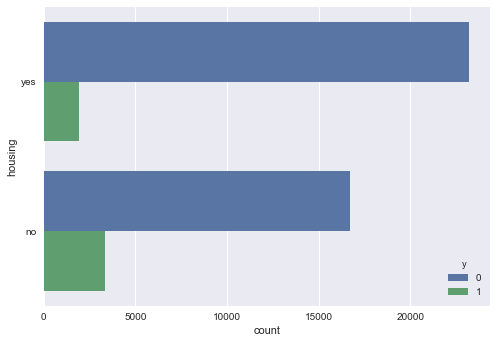

In [170]:
seaborn.countplot(y=df['housing'], hue=df['y']);

In [171]:
df['y'].groupby(df['housing']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

housing  y
no       0    0.833
         1    0.167
yes      0    0.923
         1    0.077
Name: y, dtype: float64

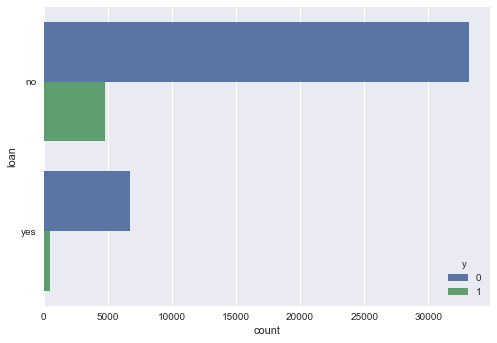

In [172]:
seaborn.countplot(y=df['loan'], hue=df['y']);

In [173]:
df['y'].groupby(df['loan']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

loan  y
no    0    0.873
      1    0.127
yes   0    0.933
      1    0.067
Name: y, dtype: float64

It seems that clients with no housing or personal loan have a higher chance to subscribe.

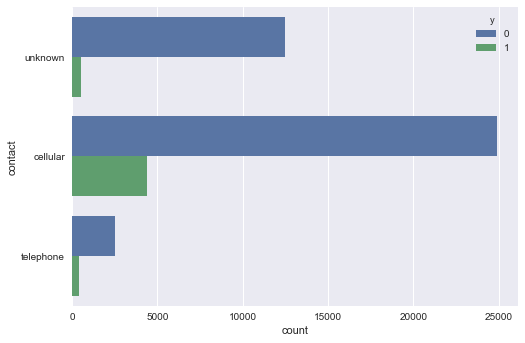

In [174]:
seaborn.countplot(y=df['contact'], hue=df['y']);

In [175]:
df['y'].groupby(df['contact']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

contact    y
cellular   0    0.851
           1    0.149
telephone  0    0.866
           1    0.134
unknown    0    0.959
           1    0.041
Name: y, dtype: float64

This indicates clients with unkonwn contact have a lower chance to subscribe. 

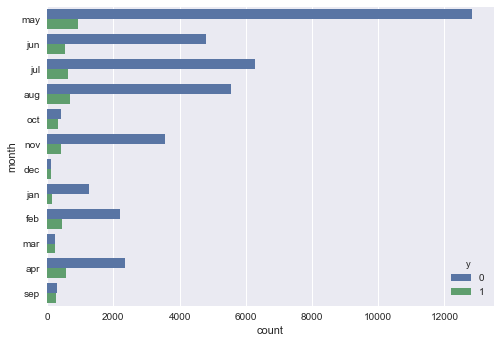

In [176]:
seaborn.countplot(y=df['month'], hue=df['y']);

In [177]:
df['y'].groupby(df['month']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

month  y
apr    0    0.803
       1    0.197
aug    0    0.890
       1    0.110
dec    0    0.533
       1    0.467
feb    0    0.834
       1    0.166
jan    0    0.899
       1    0.101
jul    0    0.909
       1    0.091
jun    0    0.898
       1    0.102
mar    1    0.520
       0    0.480
may    0    0.933
       1    0.067
nov    0    0.898
       1    0.102
oct    0    0.562
       1    0.438
sep    0    0.535
       1    0.465
Name: y, dtype: float64

Suprisingly, for different last contact month of year, there seems to be a lower % of subscribed customer, Apr, Aug, Feb, Jan, July, Jun and Nov. Maybe there's some other factors contributing to this variance. For example, for these month of year, there seem to be more contacts reach out to the clients.

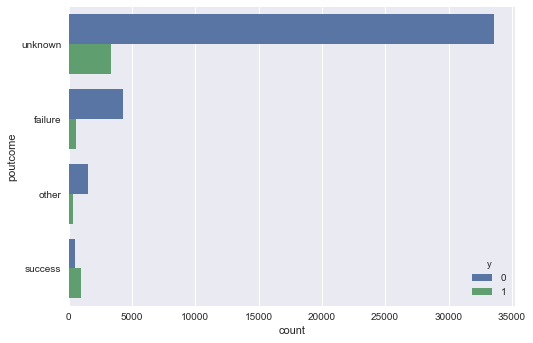

In [178]:
seaborn.countplot(y=df['poutcome'], hue=df['y']);

In [179]:
df['y'].groupby(df['poutcome']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

poutcome  y
failure   0    0.874
          1    0.126
other     0    0.833
          1    0.167
success   1    0.647
          0    0.353
unknown   0    0.908
          1    0.092
Name: y, dtype: float64

This also seem to be pretty significant, A past sucess likely increase the chance of subscription. An unknown outcome looks most unfavorable to subscription. 

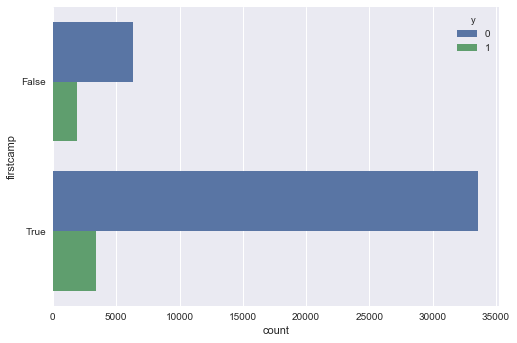

In [198]:
seaborn.countplot(y=df['firstcamp'], hue=df['y']);

In [199]:
df['y'].groupby(df['firstcamp']).value_counts().groupby(level=[0]).apply(lambda x: round(x / float(x.sum()),3))

firstcamp  y
False      0    0.769
           1    0.231
True       0    0.908
           1    0.092
Name: y, dtype: float64

The feature we added 'firstcamp' - if there is any contact performed to this customer prior to this campaign seem to be significant as well. First campaign seem to have a much lower success rate. 

## Transform Data, Prepare for Modeling

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'firstcamp'],
      dtype='object')

In [13]:
cat_features = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome','firstcamp']
df = pd.get_dummies(df, columns=cat_features)

In [14]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'firstcamp_False', 'firstcamp_True'],
      dtype='object')

In [93]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,firstcamp_False,firstcamp_True
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [12]:
df2=df

In [13]:
df2.shape

(45211, 54)

### Model Preparation

### Define Features and Target

In [15]:
df.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'firstcamp_False', 'firstcamp_True'],
      dtype=object)

In [16]:
selected_features = list(df.columns.values)
target = 'y'
selected_features.remove(target)

In [17]:
selected_features

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'firstcamp_False',
 'firstcamp_True']

In [18]:
X = df[selected_features].values
y = df[target].values

In [19]:
X.shape

(45211, 53)

In [20]:
y

array([0, 0, 0, ..., 1, 0, 0])

#### Let's Train-test split the data!

In [21]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

For Modeling, let's start with Logitic Regression for better interpretation. After we have a decent understanding of the impact of different features, we can explore other machine learning models to test for the best performing classifiers.

### Build Logistic Regression Model

#### Logistic Regression model using sklearn, with standardization, regularization, and P-value testing

Since we have both numerical and categorical features here, with different scales, let's standardize data before modeling and regularization. 

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [24]:
SX=scaler.fit_transform(X,y)

/Users/lexie/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [25]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
SX_train, SX_test, y_train, y_test = train_test_split(SX, y, test_size=0.3, random_state=0)

In [26]:
SX_train.shape

(31647, 53)

In [27]:
SX[:,1]

array([ 0.25641925, -0.43789469, -0.44676247, ...,  1.42959305,
       -0.22802402,  0.52836436])

In [28]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1,penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(SX_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(SX_train)
p_train_pred = clf.predict_proba(SX_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(SX_test)
p_test_pred = clf.predict_proba(SX_test)[:,1]

### Calculate the metric scores for the model

In [29]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [30]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.911125  0.899545
Accuracy   0.903593  0.899366
Precision  0.659553  0.629213
Recall     0.359773  0.351097
f1-score   0.465581  0.450704


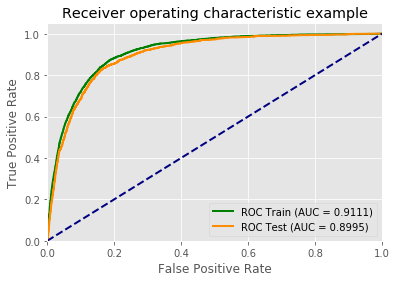

In [32]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

##### Check P-value to see if any feature needs to be excluded due to non-significance

In [42]:
from sklearn import feature_selection
f=feature_selection.f_regression(X_train, y_train, center=True)

In [43]:
from collections import OrderedDict
score = {'Feature': selected_features, 'F Score': f[0], 'P-Value': f[1]}
s = pd.DataFrame( OrderedDict(score))
s['significant']=s['P-Value']<0.1       
s

,F Score,Feature,P-Value,significant
0,19.252589,age,1.148850e-05,True
1,103.233707,balance,3.244849e-24,True
2,30.488546,day,3.384781e-08,True
3,6113.458938,duration,0.000000e+00,True
4,170.377380,campaign,7.711634e-39,True
5,301.121721,pdays,3.842233e-67,True
6,229.101605,previous,1.419227e-51,True
7,2.009034,job_admin.,1.563747e-01,False
8,149.968514,job_blue-collar,2.107594e-34,True
9,12.291853,job_entrepreneur,4.555695e-04,True


From the results we can tell, most fearures are significant, only a few levels of the features are not.

### Understanding the Estimated Coefficients

In [33]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
3,duration,1.111930
49,poutcome_success,0.363930
32,contact_cellular,0.355041
41,month_jun,0.254471
42,month_mar,0.202187
28,housing_no,0.173112
46,month_sep,0.156334
45,month_oct,0.154723
33,contact_telephone,0.125633
12,job_retired,0.092134


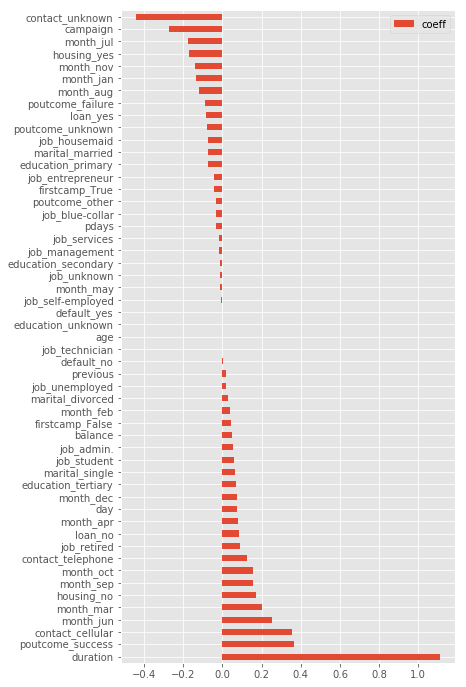

In [34]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.gcf().set_size_inches(6, 12)
plt.show()

From the coefficients, we have seen big negative correlations from:
<br>
contact_unknown, campaign, failure or unknown of result from last contact, has loans (housing or personal); 
<br>

Big positive correlations from: 
<br>
duration,success of past contact, contact vai cellular or telephone, no loans, and retired or student. 


For some reason, the month of the year seem to have a big impact as well. One of the future effort for this can be looking into the reasons behind that. 

### Bagging

#### Single Tree

              train      test
metrics                      
AUC        0.965890  0.865349
Accuracy   0.933833  0.890961
Precision  0.774725  0.543741
Recall     0.610720  0.452038
f1-score   0.683015  0.493667


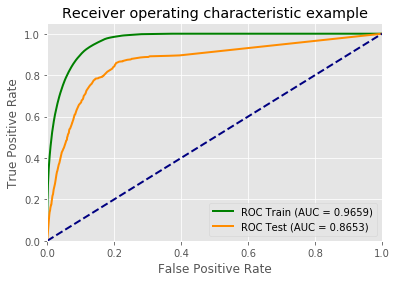

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [39]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


#### Bagged Trees

              train      test
metrics                      
AUC        0.971881  0.926288
Accuracy   0.940847  0.901946
Precision  0.824893  0.605578
Recall     0.626151  0.476489
f1-score   0.711911  0.533333


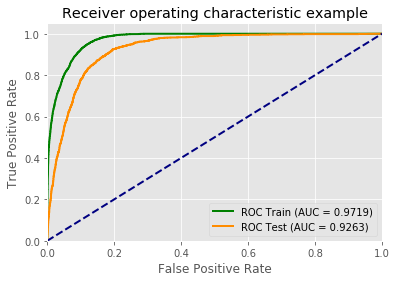

In [62]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 100,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

Bagged Tree model's performance is already better than Logistic Regression. it could be a good choice for us. But let's try other models and see if we can find a better classifier. 

#### Single KNN

              train      test
metrics                      
AUC        0.867406  0.831588
Accuracy   0.890922  0.885285
Precision  0.607460  0.541053
Recall     0.185165  0.161129
f1-score   0.283817  0.248309


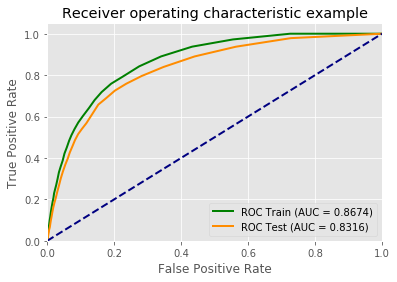

In [78]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':50,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

              train      test
metrics                      
AUC        0.868635  0.833439
Accuracy   0.891175  0.885063
Precision  0.603821  0.535433
Recall     0.196806  0.170533
f1-score   0.296856  0.258678


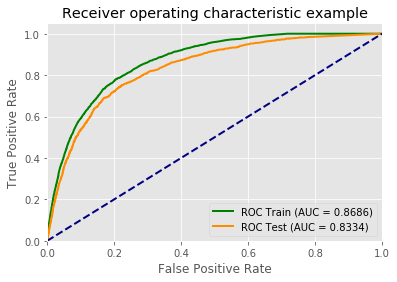

In [79]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 60,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

KNN doesn't seem to perform well in this case. If we tune the parameter to be less overfitting. The overall performance on both train and test reduce below Logistic Regression. Hence won't consider this as one of the final choices.

### Random Forest

              train      test
metrics                      
AUC        0.960571  0.924909
Accuracy   0.921193  0.899956
Precision  0.835946  0.668079
Recall     0.404169  0.296552
f1-score   0.544891  0.410769


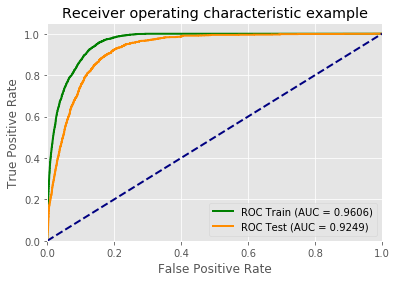

In [83]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 50,
              'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

The performance of Random Forest is as good as expected. The model runs very quickly as well. Will keep this as one of our final choices, and try grid search later as well to see if we can make the result even better.

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.967994  0.929754
Accuracy   0.944955  0.905706
Precision  0.845120  0.626603
Recall     0.646995  0.490282
f1-score   0.732904  0.550123


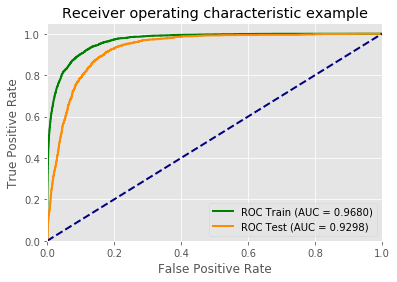

In [91]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

Gradient Boosted Tree model is so far the best performer. Will run Grid Search for Hyperparameter tuning for this as well. 

### Neural Network

              train      test
metrics                      
AUC        0.874045  0.865933
Accuracy   0.897083  0.889782
Precision  0.687876  0.595057
Recall     0.216567  0.196238
f1-score   0.329421  0.295144


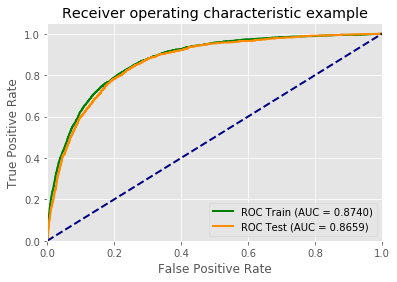

In [113]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-6, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(20,20,10), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

Neural Net is not one of the best performers in this case. For future effort, we can explore other ways to run Neural Nest and see if that can enhance the precision / recall for the model.

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.723878  0.727023
Accuracy   0.697317  0.698540
Precision  0.243885  0.247161
Recall     0.758527  0.764263
f1-score   0.369097  0.373525


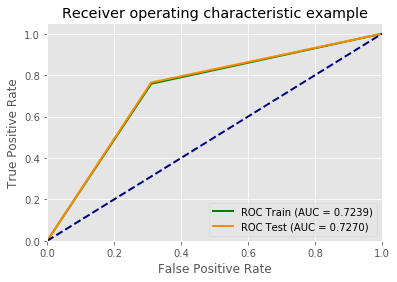

In [114]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

C:\Users\Niez\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              train      test
metrics                      
AUC        0.920017  0.660793
Accuracy   0.940753  0.882483
Precision  1.000000  0.666667
Recall     0.492420  0.001254
f1-score   0.659895  0.002503


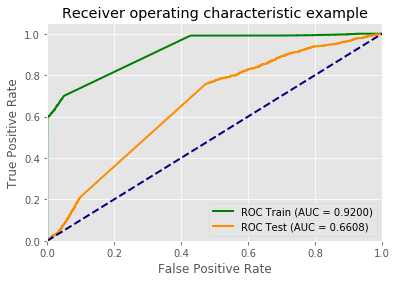

In [115]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

Tried SVM just for the integrity of model selection. The performance is not as good, and the speed is much slower than other models. 

-----

Finally Let's pick the best performers to do Grid Search HyperParameter Tuning. Based on test AUC output and running speed, Random Forest and Gradient Boosted Trees are selected. 

### HyperParameter Tuning: Grid Search: Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [40,50,60], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.996629  0.927309
Accuracy   0.971656  0.903347
Precision  0.983743  0.647917
Recall     0.769897  0.389969
f1-score   0.863781  0.486888


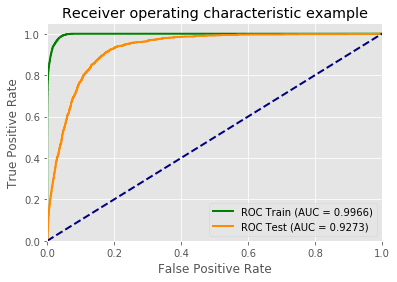

In [117]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search: Gradient Boosted Trees

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = GradientBoostingClassifier()


# Choose some parameter combinations to try
param_grid = {'n_estimators': [50,100], 
              'max_features': ['auto'], 
              'learning_rate': [0.2],
              'max_depth': [4,5,6], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=6,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.979974  0.929766
Accuracy   0.960533  0.906665
Precision  0.907636  0.623406
Recall     0.736871  0.521003
f1-score   0.813387  0.567623


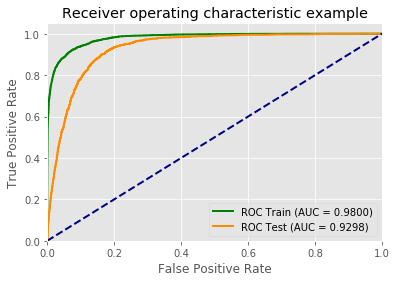

In [40]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

Grandient Boosted Trees still seem to be the best performing classifier, we'll use this as our final choice if we don't need too much interpretability. 

If we do, Logistic Regression can be our first choice. 